In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
Survived = df[df["Survived"]==1]
Non_Survived = df[df["Survived"]==0]
outlier = len(Survived)/float(len(Non_Survived))
print(outlier)
print("Survived : {} " .format(len(Survived)))
print("Non_Survived : {} " .format(len(Non_Survived)))

0.6229508196721312
Survived : 342 
Non_Survived : 549 


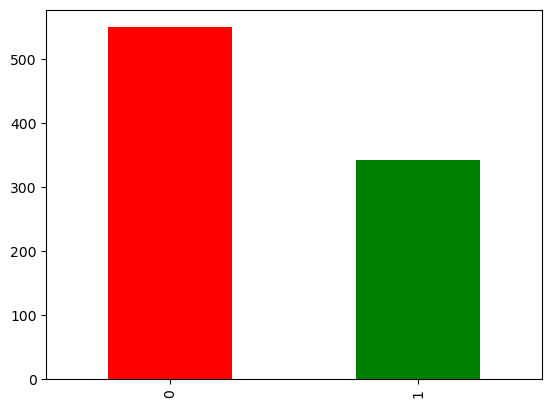

In [6]:
#plot total count in Survived Column (0 = No, 1 = Yes)
df['Survived'].value_counts().plot(kind='bar', color=['red', 'green']);

### A comparison revealed that more than 60% of the passengers had died.

In [7]:
#checking Missing Values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Handling missing values in Age with median
df['Age'] = df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [9]:
# Handling missing values in Cabin with nan
df['Cabin'].fillna('nan', inplace=True)

In [10]:
# Handling missing values in Embarked with mode()[0]
df['Embarked'].fillna(df.Embarked.mode()[0], inplace=True)

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Exporatory Data Analysis :

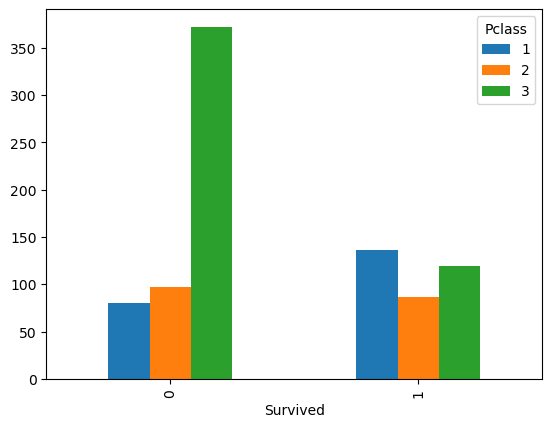

In [12]:
#Compare Survived Column with Pclass
pd.crosstab(df.Survived, df.Pclass).plot(kind='bar');

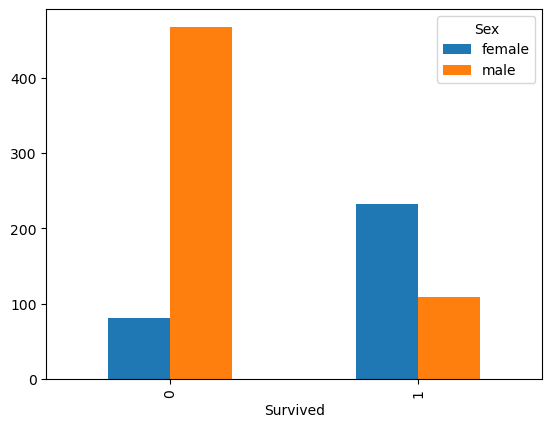

In [13]:
#Compare Survived Column with Sex
pd.crosstab(df.Survived, df.Sex).plot(kind='bar');

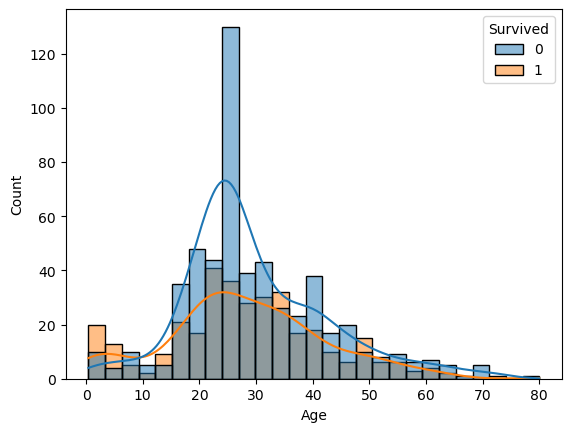

In [14]:
#Age Distribution by Survival:
import seaborn as sns
sns.histplot(data=df, x='Age', hue='Survived', kde=True);

### Observation:
Notable variations in survival rates can be observed across different age groups. Children and some elderly passengers appear to have higher survival rates, while there's a dip in survival for young adults.

In [15]:
# Creating Age group column for analysis
df['Age_group'] = pd.cut(df['Age'], bins=[0,25,50,75,100], labels=['0-25', '25-50','50-75','75-100'])

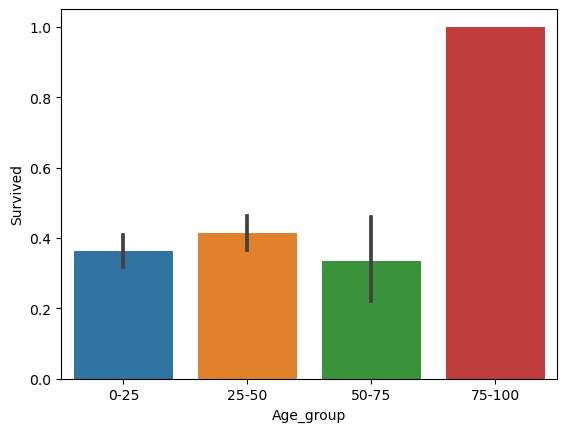

In [16]:
#Compare Survived Column with Age_group
sns.barplot(x='Age_group',y='Survived',data=df);

### Observation:
Investigating the relationship between age groups and survival rates on the Titanic, it becomes evident that passengers falling within the 75-100 age group exhibited a notably higher survival rate compared to other age brackets.

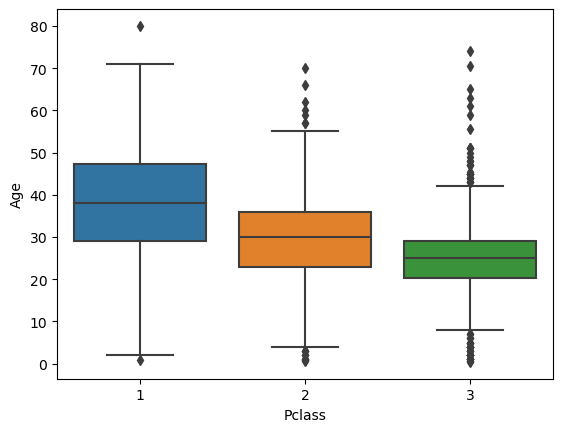

In [17]:
# Boxplot of Age by Pclass:
sns.boxplot(x='Pclass',y='Age',data=df);

### Observation:
The boxplot reveals notable differences in age distributions among the three passenger classes. Passengers in the first class tend to be older on average, with a wider range of ages and potential outliers. In contrast, the second and third classes show relatively younger age distributions.

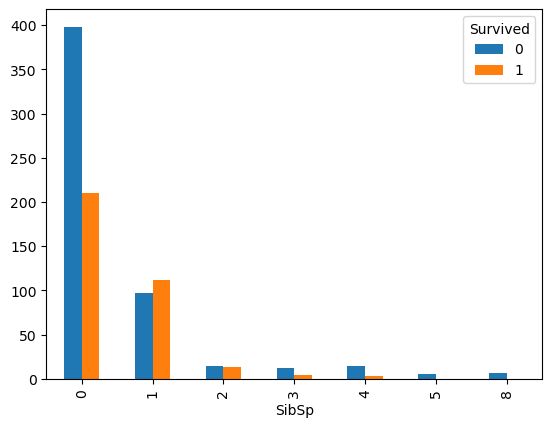

In [18]:
#Compare Survived Column with SibSp
pd.crosstab(df.SibSp, df.Survived).plot(kind='bar');

### Observation:
SibSp is no of siblings / spouses aboard the Titanic. Survived rate is high in travel with no SibSp (sibling) and survived rate become lower as no of SibSp incresses. 

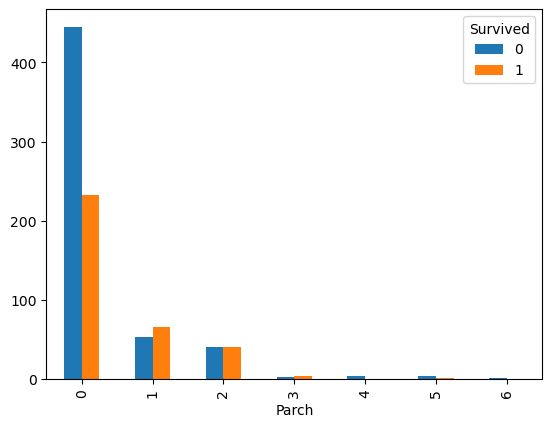

In [19]:
#Compare Survived Column with Parch
pd.crosstab(df.Parch, df.Survived).plot(kind='bar');

### Observation:
Parch is no of parents / children aboard the Titanic. similer to Siblib survived rate is high in travel with no parch and survived rate become lower as no of parch incresses. 

In [20]:
# Creating Family size column for analysis
df['Family_size']=df['SibSp'] + df['Parch']+1

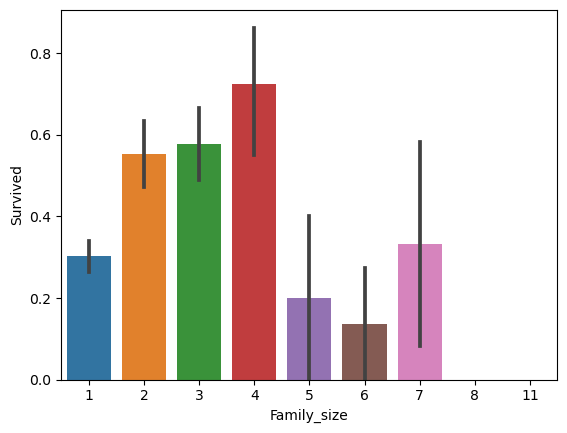

In [21]:
#Survival Rate by Sibling/Spouse (SibSp) and Parent/Child (Parch) Counts:
sns.barplot(x='Family_size',y='Survived',data=df);

## Observation:
The bar plot illustrates that passengers with a family size of 4 tend to have a notably higher survival rate compared to other family sizes. 

In [22]:
# creating Fare range column for analysis
df['Fare_range']=pd.qcut(df['Fare'],q=3,labels=['Low','Medium','High'])

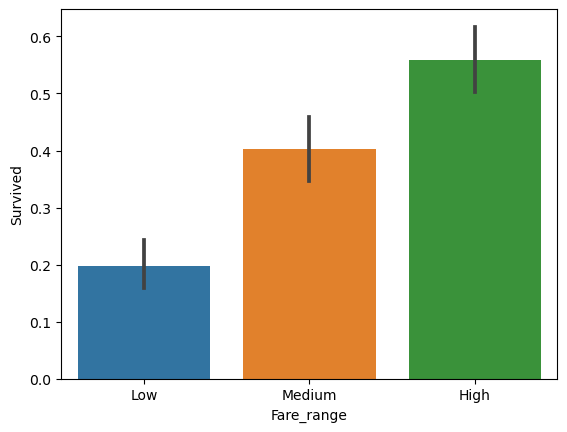

In [23]:
# Survival Rate by Fare Range:
sns.barplot(x="Fare_range",y="Survived",data=df);

## Observation:
The bar plot illustrates a trend where passengers who paid higher fares experienced higher survival rates,

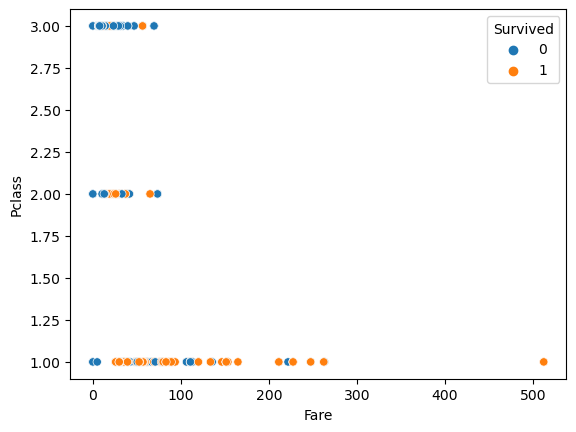

In [24]:
# Survival Rate by Ticket Class and Fare:
sns.scatterplot(x='Fare',y='Pclass',hue='Survived',data=df);

In [25]:
# Creating Cabin and Nocabin information for analysis
df['HasCabin']=df['Cabin'].apply(lambda x: 0 if x=='nan' else 1)

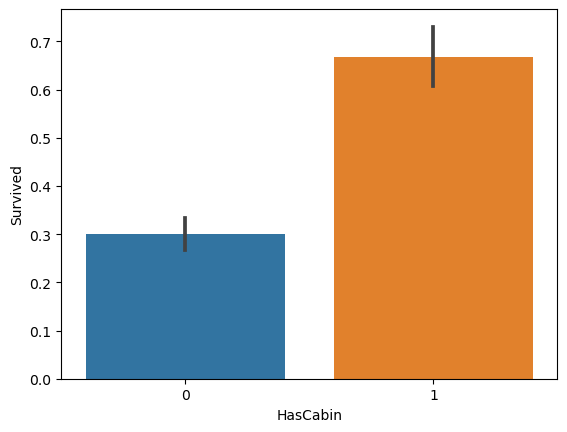

In [26]:
# Survival Rate by Cabin vs. No Cabin:
sns.barplot(x='HasCabin',y='Survived',data=df);

## Observaion:
The bar plot illustrates that passengers who had a recorded cabin have a higher survival rate compared to those without a recorded cabin. 

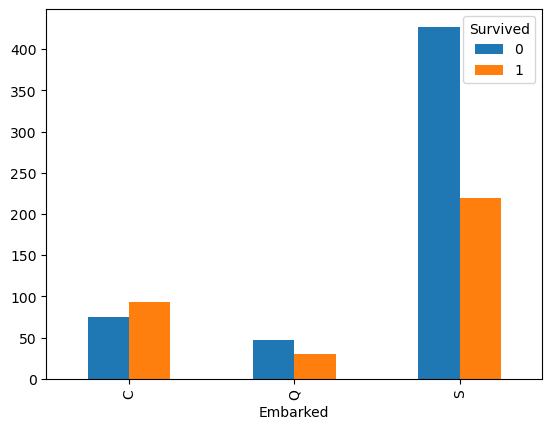

In [27]:
#Compare Survived Column with Embarked
pd.crosstab(df.Embarked, df.Survived).plot(kind='bar');

### Observation:
Passengers who embarked at Cherbourg (C) appear to have a higher survival rate compared to those who embarked at Southampton (S) or Queenstown (Q).

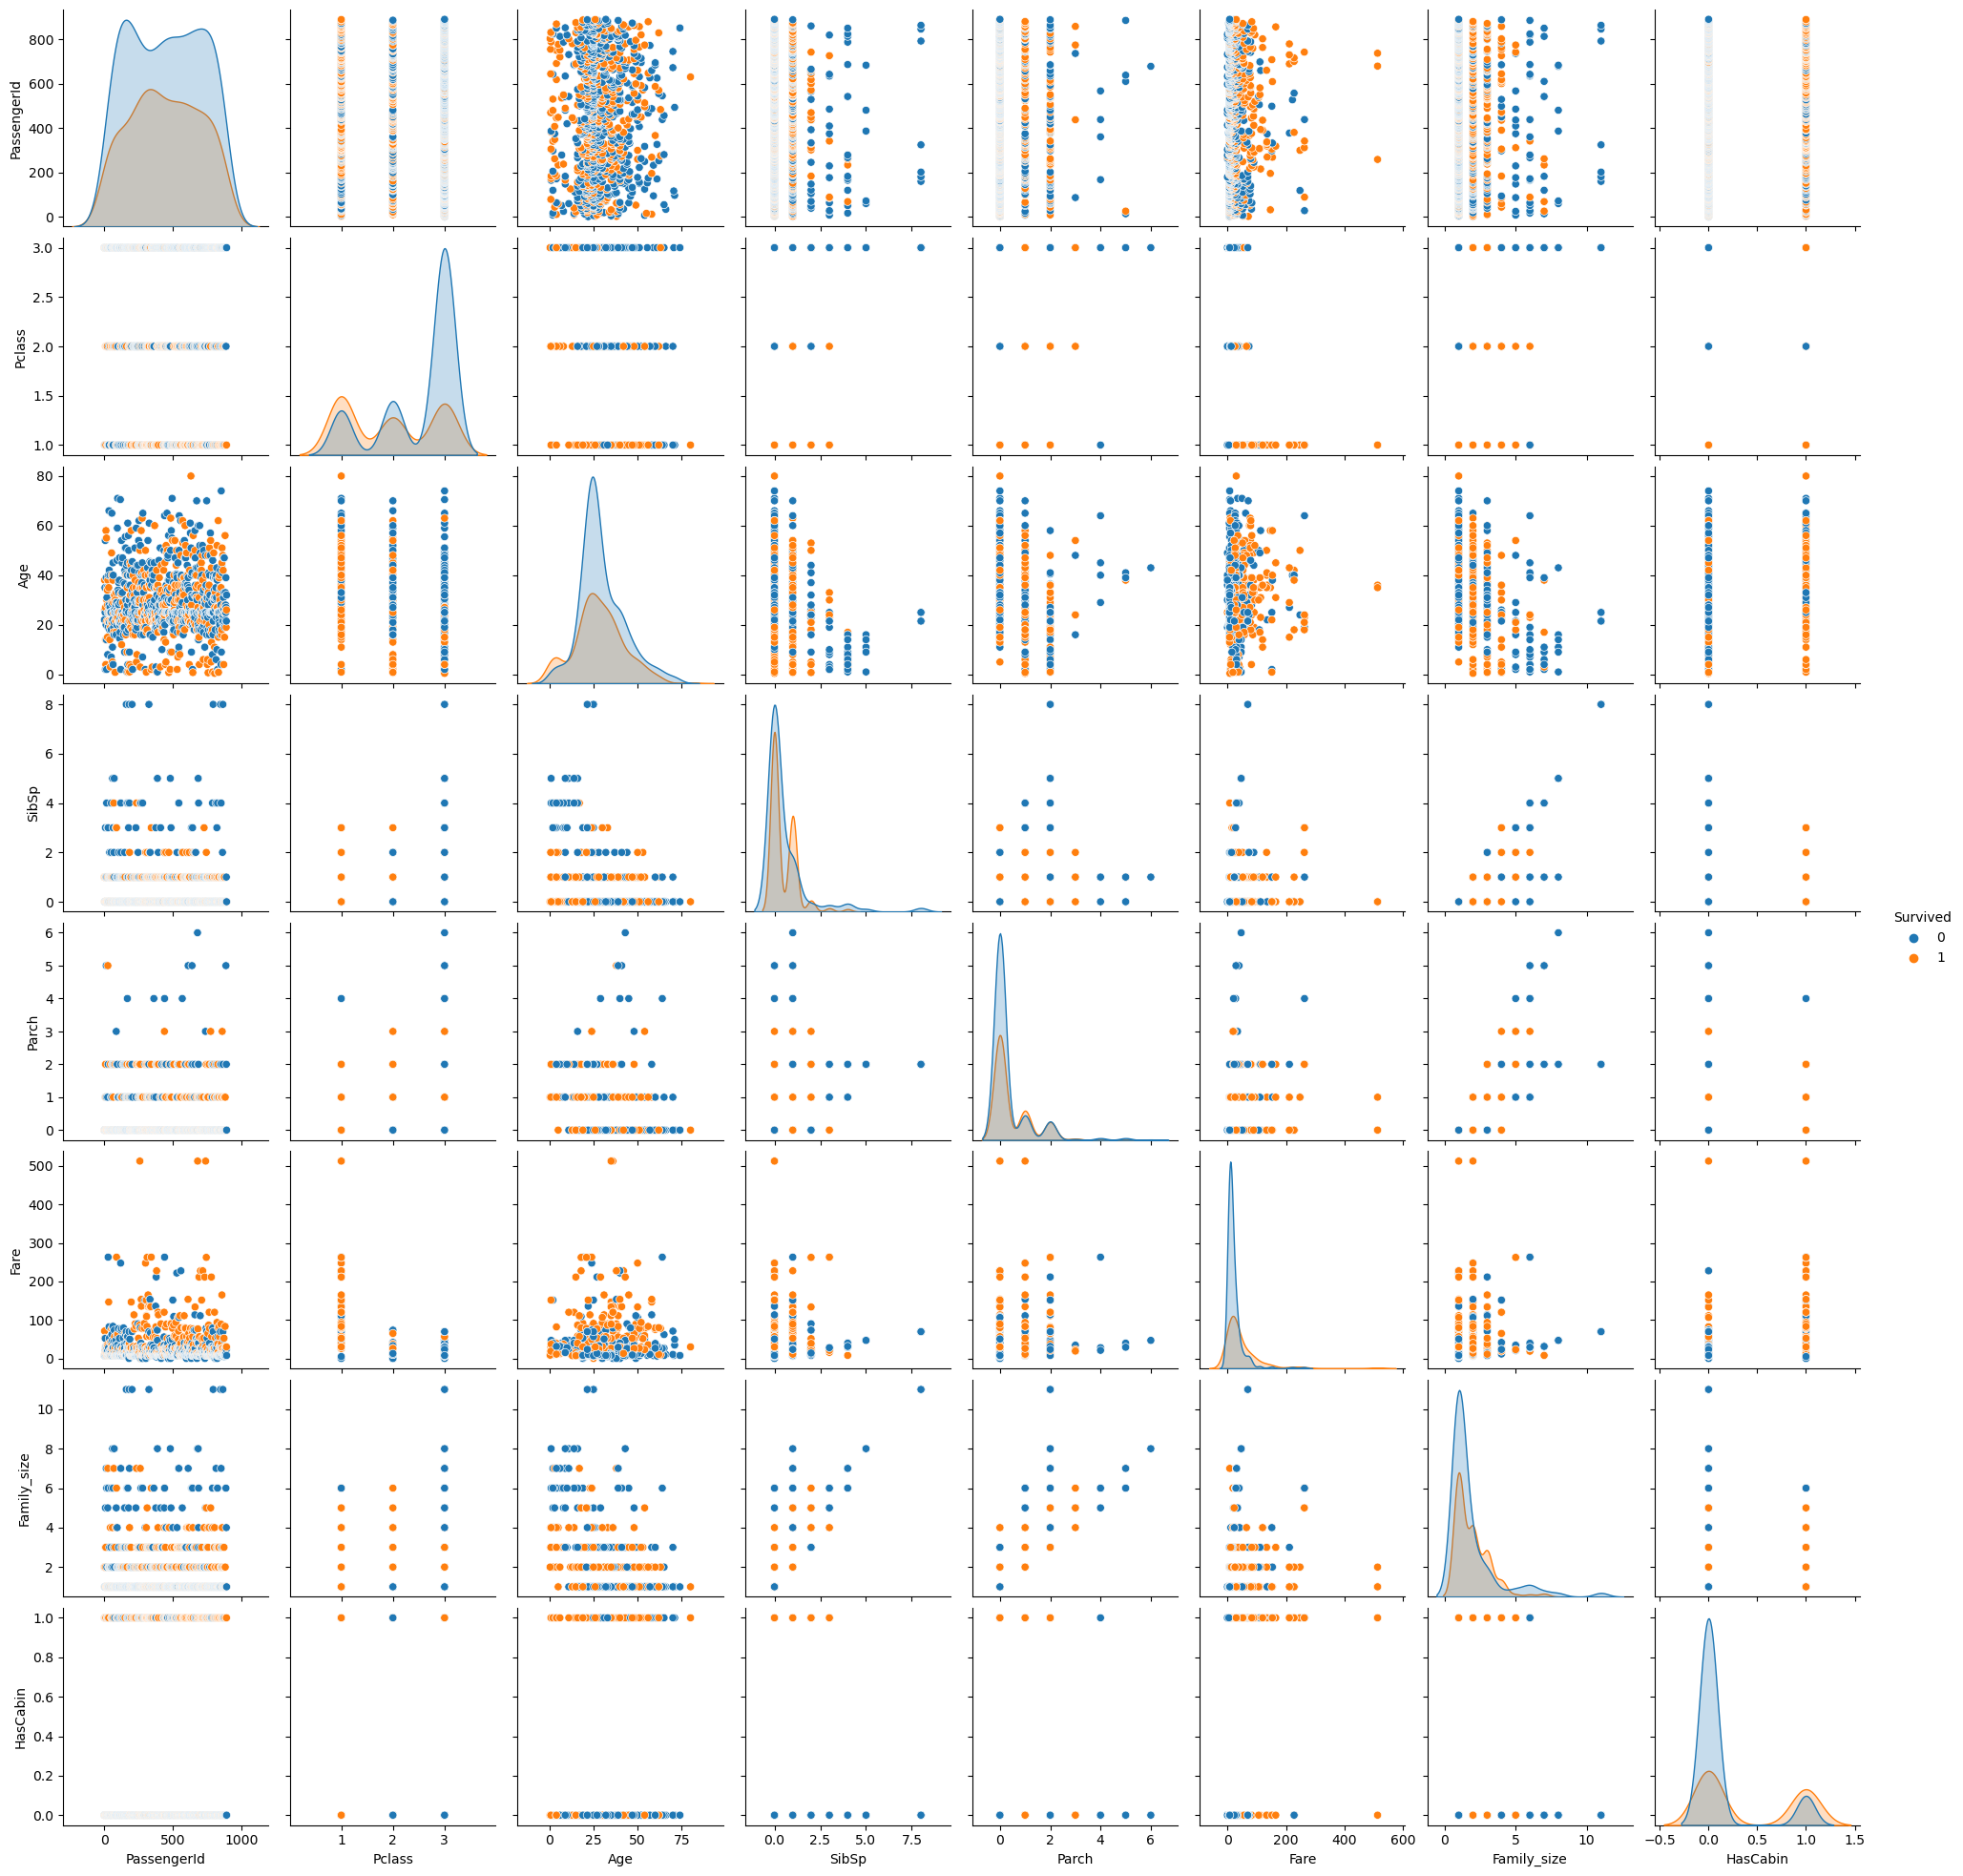

In [28]:
#Plot pairwise relationships between variables within a dataset
sns.pairplot(df,hue='Survived');

In [29]:
Survived = df[df["Survived"]==1]
Non_Survived = df[df["Survived"]==0]
outlier = len(Survived)/float(len(Non_Survived))
print(outlier)
print("Survived : {} " .format(len(Survived)))
print("Non_Survived : {} " .format(len(Non_Survived)))

0.6229508196721312
Survived : 342 
Non_Survived : 549 


# Observations:
1. PassengerId, name, Ticket does not create any value to our model. So, we drop the feature.
2. SibSp and Parch are combin with one column name Family-size. So, we drop these fearures.
3. Fare and cabin columns are converted to Fare_range and hasCabin columns respectivaly. So, we drop these feature.

In [30]:
# Filter relevent features
final_df = df[["Survived", "Pclass", "Sex", "Age", "Family_size","Fare_range","HasCabin","Embarked"]]

In [31]:
final_df.head(2)

,Survived,Pclass,Sex,Age,Family_size,Fare_range,HasCabin,Embarked
0,0,3,male,22.0,2,Low,0,S
1,1,1,female,38.0,2,High,1,C


In [32]:
final_df.shape

(891, 8)

In [33]:
#Create seprate columns for categorical values (get.dumies)
final_df= pd.get_dummies(final_df, columns=['Sex','Fare_range','Embarked'], drop_first=True) 

In [34]:
final_df.shape

(891, 10)

In [35]:
final_df.head(2)

,Survived,Pclass,Age,Family_size,HasCabin,Sex_male,Fare_range_Medium,Fare_range_High,Embarked_Q,Embarked_S
0,0,3,22.0,2,0,1,0,0,0,1
1,1,1,38.0,2,1,0,0,1,0,0


# Model Building

In [36]:
#Create data for Model
X=final_df.drop('Survived', axis=1)
y=final_df['Survived']

In [37]:
#split the data into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [39]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=80, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [40]:
#Create Dictinory of Clfs
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt
}

In [41]:
# Function for Calculate accuracy,precision_score
from sklearn.metrics import accuracy_score, precision_score
def train_classifer(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred =clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision   

In [42]:
accuracy_scores_list = []
precision_scores_list = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifer(clf,X_train,y_train,X_test,y_test)
    
    print("For", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    
    accuracy_scores_list.append(current_accuracy)    
    precision_scores_list.append(current_precision)

C:\Users\Sajid Mehar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For SVC
Accuracy - 0.6201117318435754
Precision - 0.0
For KN
Accuracy - 0.8044692737430168
Precision - 0.7704918032786885
For NB
Accuracy - 0.7262569832402235
Precision - 0.6862745098039216
For DT
Accuracy - 0.8268156424581006
Precision - 0.8135593220338984
For LR
Accuracy - 0.8100558659217877
Precision - 0.7428571428571429
For RF
Accuracy - 0.8044692737430168
Precision - 0.7538461538461538
For AdaBoost
Accuracy - 0.8324022346368715
Precision - 0.7878787878787878
For BgC
Accuracy - 0.8100558659217877
Precision - 0.7741935483870968
For ETC
Accuracy - 0.7821229050279329
Precision - 0.7101449275362319
For GBDT
Accuracy - 0.8212290502793296
Precision - 0.8461538461538461


# Creatig Data Frame:

In [43]:
performace_df =pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy': accuracy_scores_list, 'Precision': precision_scores_list})

In [44]:
performace_df

,Algorithm,Accuracy,Precision
0,SVC,0.620112,0.000000
1,KN,0.804469,0.770492
2,NB,0.726257,0.686275
3,DT,0.826816,0.813559
4,LR,0.810056,0.742857
5,RF,0.804469,0.753846
6,AdaBoost,0.832402,0.787879
7,BgC,0.810056,0.774194
8,ETC,0.782123,0.710145
9,GBDT,0.821229,0.846154


In [45]:
performance_df1 = pd.melt(performace_df, id_vars = "Algorithm")

In [46]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.620112
1,KN,Accuracy,0.804469
2,NB,Accuracy,0.726257
3,DT,Accuracy,0.826816
4,LR,Accuracy,0.810056
5,RF,Accuracy,0.804469
6,AdaBoost,Accuracy,0.832402
7,BgC,Accuracy,0.810056
8,ETC,Accuracy,0.782123
9,GBDT,Accuracy,0.821229


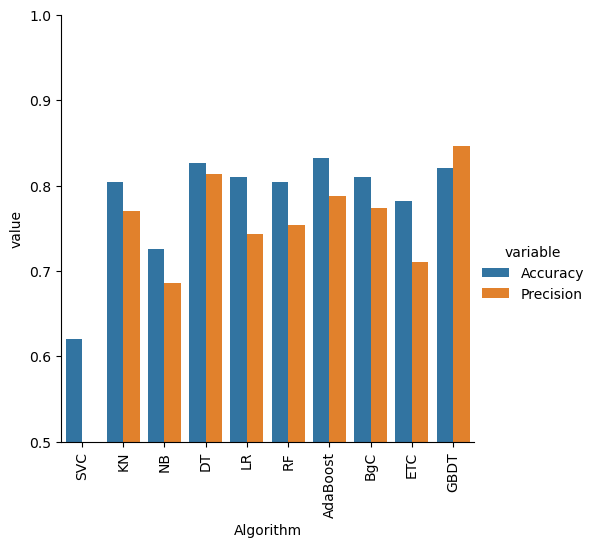

In [50]:
import matplotlib.pyplot as plt
sns.catplot(x='Algorithm', y='value', hue='variable', data=performance_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [55]:
AdaBoost = AdaBoostClassifier(n_estimators=50, random_state=2)
train_classifer(abc, X_train, y_train, X_test, y_test)

(0.8324022346368715, 0.7878787878787878)

### AdaBoostClassifier gives highest accuracy (83%) as compared to others.